# JAX Numpy => JNP (lax backed)

In [1]:
import jax
import jax.numpy as jnp
from jax import random

In [2]:
key = random.PRNGKey(0)
key, subkey = random.split(key)
x = random.normal(key, (5000, 5000))

print(x.shape)
print(x.dtype)

(5000, 5000)
float32


In [3]:
y = jnp.dot(x, x)
print(y[0, 0])

63.82817


In [4]:
x

DeviceArray([[-0.03182802,  0.05624727, -0.03447726, ..., -0.6506611 ,
               0.188141  , -0.4943332 ],
             [-0.46550497,  1.034583  , -1.0246143 , ...,  0.7965949 ,
               1.5315311 , -0.1446576 ],
             [ 0.4603889 ,  1.2810655 ,  0.1406628 , ..., -0.03909646,
               1.2251557 ,  1.9469196 ],
             ...,
             [-0.1792087 ,  0.12796777, -1.2290448 , ...,  0.07305165,
              -0.7417593 ,  0.84448427],
             [ 0.06088204, -0.359062  , -0.0271101 , ..., -0.78110397,
               0.5980011 ,  0.30552095],
             [-1.2617211 ,  1.0971762 , -0.18960644, ..., -0.7506782 ,
               0.08892686, -1.4386775 ]], dtype=float32)

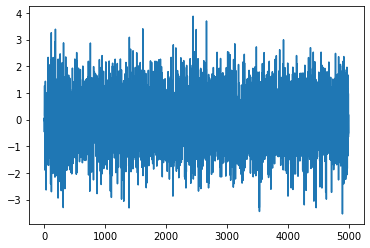

In [5]:
import matplotlib.pyplot as plt

plt.plot(x[0])

In [6]:
print(jnp.dot(x, x.T))


[[ 5.0231143e+03 -3.1962633e+01 -4.6788857e+01 ...  1.6453232e+01
   2.3000103e+01  2.8942369e+01]
 [-3.1962633e+01  4.8936460e+03  1.9905313e+01 ...  8.0806206e+01
  -3.6203564e+01 -1.2045704e+00]
 [-4.6788857e+01  1.9905313e+01  4.9168413e+03 ... -1.1356275e+01
  -1.4244254e+02  9.2606316e+01]
 ...
 [ 1.6453232e+01  8.0806206e+01 -1.1356275e+01 ...  5.0156406e+03
   3.2550369e+01 -8.2916573e+01]
 [ 2.3000103e+01 -3.6203564e+01 -1.4244254e+02 ...  3.2550369e+01
   5.0410088e+03  1.3218843e+01]
 [ 2.8942369e+01 -1.2045704e+00  9.2606316e+01 ... -8.2916573e+01
   1.3218843e+01  5.0226338e+03]]


In [7]:
print(jnp.dot(x, 2 * x)[[0, 2, 1, 0], ..., None, ::-1])


[[[  -7.3726435 -265.24042    181.95457   ...   50.78956     52.270565
    127.65634  ]]

 [[ -14.697224   134.9537     181.26367   ...  -69.47163    148.67259
     51.27031  ]]

 [[   5.730926  -152.30022     98.68247   ... -181.2178     317.64774
     -5.8901734]]

 [[  -7.3726435 -265.24042    181.95457   ...   50.78956     52.270565
    127.65634  ]]]


# milli benchmarks  ;)

In [8]:
import numpy as np

x_cpu = np.array(x)
%timeit -n 5 -r 2 np.dot(x_cpu, x_cpu)


219 ms ± 6.08 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [9]:
%timeit -n 5 -r 5 jnp.dot(x, x).block_until_ready()

2.54 ms ± 13.1 µs per loop (mean ± std. dev. of 5 runs, 5 loops each)
